# 7일차

# 1. 데이터 프레임

In [2]:
import pandas as pd
student = {'math':[90, 10], 'enl':[90, 10], 'kor':[100, 10], 'his':[80, 10], 'art':[95, 10]}
df = pd.DataFrame(student)
df

df = pd.DataFrame(student, columns = ['a','b','c','d','e']) # 컬럼명을 설정할 때 키와 컬럼명이 다르면 키를 못찾아 값을 못가져옴
df

df = pd.DataFrame(student, columns = ['math', 'enl', 'kor','his','art'])
df

,math,enl,kor,his,art
0,90,90,100,80,95
1,10,10,10,10,10


## 2) 데이터프레임 > 딕셔너리

In [6]:
# 열이름 = 키 레코드 = 값 인덱스 = 키
dict1 = df.to_dict()
print(dict1)

# df.to_dict('list') 열이름 = 키, 값 쌍은 각각의 목록으로 변환
dict1 = df.to_dict('list')
print(dict1)

# df.to_dict('index') 인덱스 = 키, 각 행 = 값
dict1 = df.to_dict('index')
print(dict1)

# df.to_dict('records') 각 행을 사전형
dict1 = df.to_dict('records')
print(dict1)

{'math': {0: 90, 1: 10}, 'enl': {0: 90, 1: 10}, 'kor': {0: 100, 1: 10}, 'his': {0: 80, 1: 10}, 'art': {0: 95, 1: 10}}
{'math': [90, 10], 'enl': [90, 10], 'kor': [100, 10], 'his': [80, 10], 'art': [95, 10]}
{0: {'math': 90, 'enl': 90, 'kor': 100, 'his': 80, 'art': 95}, 1: {'math': 10, 'enl': 10, 'kor': 10, 'his': 10, 'art': 10}}
[{'math': 90, 'enl': 90, 'kor': 100, 'his': 80, 'art': 95}, {'math': 10, 'enl': 10, 'kor': 10, 'his': 10, 'art': 10}]


In [11]:
# index
print(df.index) # 시작값부터 종료값-1

# values
print(df.values) # 리스트 값만 출력

# columns
print(df.columns) # df의 컬럼명이 모두 출력, dtype = 'object'

# dtype
print(df.dtypes)

RangeIndex(start=0, stop=2, step=1)
[[ 90  90 100  80  95]
 [ 10  10  10  10  10]]
Index(['math', 'enl', 'kor', 'his', 'art'], dtype='object')
math    int64
enl     int64
kor     int64
his     int64
art     int64
dtype: object


In [14]:
# info(): .info()를 이용하여 데이터 df의 정보를 출력
df.info()

# head(): .head() 상위 5행을 출력
df.head()

# tail()
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   math    2 non-null      int64
 1   enl     2 non-null      int64
 2   kor     2 non-null      int64
 3   his     2 non-null      int64
 4   art     2 non-null      int64
dtypes: int64(5)
memory usage: 208.0 bytes


,math,enl,kor,his,art
0,90,90,100,80,95
1,10,10,10,10,10


## 3) 데이터프레임 수정, 추가, 삭제

> 컬럼명 수정

일부를 수정할 때 rename을 이용하면 원본이 수정되지 않음

원본 수정을 하고 싶을때는 inplace = True를 사용하면 됨

In [21]:
# 전체 컬럼명 수정
df.columns = ['col1', 'col2', 'col3', 'col4', 'col5']
df

# 일부 컬럼명 수정
df.rename(columns = {'col1':'math'}, inplace = True)
df

# 전체 인덱스명 수정
df.index = ['idx1', 'idx2']
df

# 일부 인덱스명 수정
df.rename(index = {'idx1':'idx50'}, inplace = True)
df

,math,col2,col3,col4,col5
idx50,90,90,100,80,95
idx2,10,10,10,10,10


> 행과 열 추가

In [25]:
li1 = [[0, 0], [0, 0]]
df = pd.DataFrame(li1)
df

df.columns = ['a','b'] # 컬럼명 변경
df

# 새로운 행 만들기
df.loc[2] = 1
df

# 새로운 열 만들기
df['D'] = ['A', 'B', 'C']
# df['D'] = ['A', 'B'] # 행과 열에 Value 값이 맞지 않아 오류발생
df

,a,b,D
0,0,0,A
1,0,0,B
2,1,1,C


> 값 삭제

일부를 삭제할 때 drop을 이용하면 원본이 수정되지 않음

원본 삭제를 하고 싶을때는 inplace = True를 사용하면 됨

In [30]:
# 행 삭제
# df.drop(2, inplace = True)
# df

# 열 삭제
df.drop('D', axis = 1, inplace = True) # axis  = 'columns' or 1
df

,a,b
0,0,0
1,0,0


## 4) 행 선택(loc, iloc)

In [35]:
# 데이터 프레임 값을 수정할 때 많이 사용

# 열 전체 값 수정
df['a'] = 1
df

# 행 전체 값 수정
df.loc[2] = 'x'
df

# 특정 값 수정 df.loc[행 인덱스, 열이름] = 새로운 값
df.loc[2, 'D'] = 'p'
df

# 행 인덱스 0, 컬럼 b > 'A'
df.loc[0, 'b'] = 'A'
df

,a,b,D
0,1,A,NaN
1,1,0,NaN
2,x,x,p


# 2. 데이터 시각화

## 4) matplotlib 사용

In [36]:
import matplotlib
matplotlib.__version__ # '3.2.2' 버전 확인




'3.2.2'

## (1) 캔버스 생성

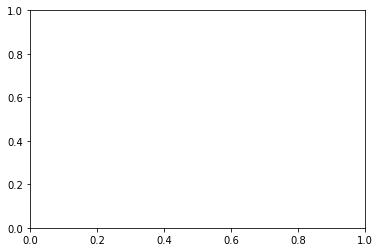

In [38]:
import matplotlib.pyplot as plt

figure = plt.figure() # 1행 1열 1번째 subplot
axes = figure.add_subplot(1, 1, 1)
plt.show()

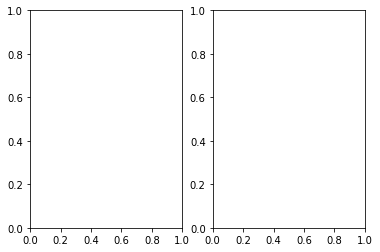

In [39]:
# 전체영역 만들기

figure = plt.figure()

# 1행 2열 1번째
axes1 = figure.add_subplot(1, 2, 1)

# 1행 2열 2번째
axes2 = figure.add_subplot(1, 2, 2)

plt.show()

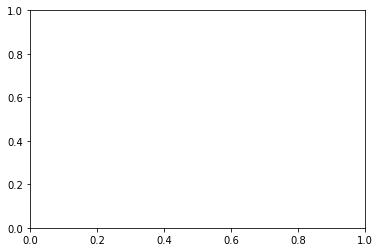

In [40]:
# 쉼표 생략가능(2자는 인식 x)
figure = plt.figure()

axes = figure.add_subplot(111)
plt.show()

## (2) plot() : 꺾은 선형그래프

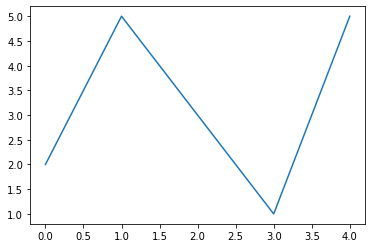

In [41]:
figure = plt.figure()
axes = figure.add_subplot(111)

# x축과 y축 리스트형태로 생성
# 그래프가 1개일 때
x = [0,1,2,3,4]
y = [2,5,3,1,5]
axes.plot(x, y)
plt.show()

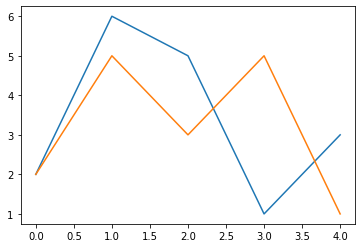

In [43]:
# 그래프가 여러개 일 때
figure = plt.figure()
axes = figure.add_subplot(111)
x1 = [0,1,2,3,4] 
y1 = [2,6,5,1,3]
x2 = [0,1,2,3,4]
y2 = [2,5,3,5,1]
# axes.plot(x1, y1)
# axes.plot(x2, y2)
axes.plot(x1, y1, x2, y2)
plt.show()


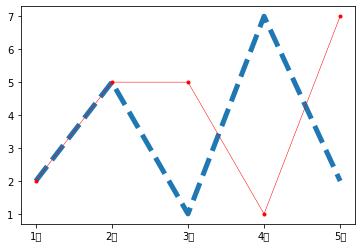

In [48]:
# 굵기와 선모양, 색상, 점 표시 등 변경 가능
figure = plt.figure()
axes = figure.add_subplot(111)

x1 = ['1월', '2월', '3월', '4월', '5월']
y1 = [2,5,1,7,2]
x2 = ['1월', '2월', '3월', '4월', '5월']
y2 = [2,5,5,1,7]
axes.plot(x1,y1, linestyle = 'dashed', linewidth = '5.0')
axes.plot(x2,y2, color = 'r', marker = '.', linewidth = '0.5')
plt.show()

## +) 한글 깨짐 설정

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


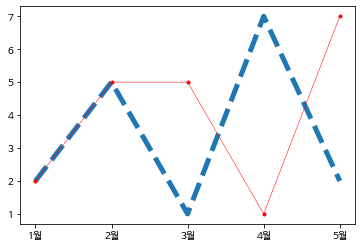

In [4]:
import matplotlib.pyplot as plt
!sudo apt-get install -y fonts-nanum 
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 런타임 재시작
plt.rc('font', family = 'NanumBarunGothic')

figure = plt.figure()
axes = figure.add_subplot(111)
axes = figure.add_subplot(111)

x1 = ['1월', '2월', '3월', '4월', '5월']
y1 = [2,5,1,7,2]
x2 = ['1월', '2월', '3월', '4월', '5월']
y2 = [2,5,5,1,7]
axes.plot(x1,y1, linestyle = 'dashed', linewidth = '5.0')
axes.plot(x2,y2, color = 'r', marker = '.', linewidth = '0.5')
plt.show()

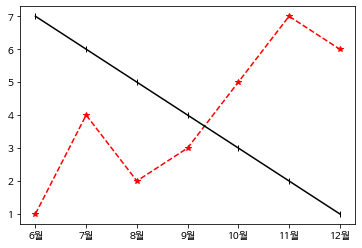

In [19]:
# 6월부터 12월 까지 > 그래프 2개 생성
# 첫번째
# 과자 판매량을 본인이 맘에 드는 만큼 설정해서 (6 - 1, 7 - 4, 8 - 2, 9 - 3, 10 - 5, 11 - 7, 12 - 6)
# 빨간색 대쉬, 마커 '*'
figure = plt.figure()
axes = figure.add_subplot(111)


x1 = ['6월', '7월', '8월', '9월', '10월', '11월', '12월']
y1 = [1,4,2,3,5,7,6]
axes.plot(x1,y1, color = 'r', linestyle = 'dashed', marker = "*")
# 두번째
# 6월 1, 12 7 (점점 감소하도록 설정)
# 검은색 라인, 마커는 '|'
x2 = ['6월', '7월', '8월', '9월', '10월', '11월', '12월']
y2 = [7,6,5,4,3,2,1]
axes.plot(x2,y2, color = 'black', marker = "|")
plt.show()


## 3) bar() : 막대그래프

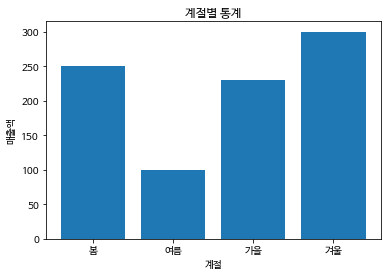

In [12]:
figure = plt.figure()
axes = figure.add_subplot(111)

x = ['봄', '여름', '가을', '겨울']
y = [250, 100, 230, 300]

axes.bar(x, y)
# plt.show()

# 타이틀 생성(계절병 통계)
plt.title('계절별 통계')
# plt.show()

# x축 라벨 생성(계절)
plt.xlabel('계절')

# y축 라벨 생성(매출액)
plt.ylabel('매출액')
plt.show()

## 4) scatter() : 산포 그래프

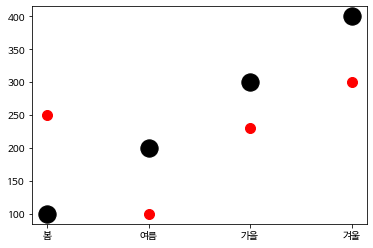

In [16]:
figure = plt.figure()
axes = figure.add_subplot(111)

x1 = ['봄', '여름', '가을', '겨울']
y1 = [250, 100, 230, 300]
x2 = ['봄', '여름', '가을', '겨울']
y2 = [100, 200, 300, 400]
axes.scatter(x1, y1, s = 100, c = 'red')
axes.scatter(x2, y2, s = 300, c = 'black')
plt.show()

## 5) pie() : 원형 그래프

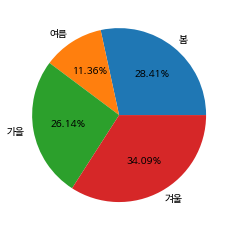

In [24]:
figure = plt.figure()
axes = figure.add_subplot()

labels = ['봄', '여름', '가을', '겨울']
ratio = [25, 10, 23, 30] # 100을 기준으로 각 값이 몇퍼센트를 차지하는지 출력

axes.pie(ratio, labels = labels, autopct = '%.2f%%')
# autopct는 부채꼴 안에 표시될 숫자의 형태를 지정할 수 있는 옵션 > # %.1f 소수점 한자리까지 출력 .%% > %를 표시, %를 아예 안쓰고 싶을 경우 맨뒤에 %를 작성하지 않는다. 
plt.show()

